#  Loan Eligibility Prediction based on Credit Risk through Machine Learning Models

##### Companies aim to enhance the loan qualification process by automating it in real time using the information provided by customers through an online application form. The goal is to develop machine learning models that can accurately predict loan approval, thus expediting the decision-making process for determining the eligibility of loan applicants.
##### Moreover, Companies and individuals may benefit from a loan eligibility prediction model for several reasons inlcuding Efficiency where Loan eligibility prediction models automate the assessment process, saving time and resources for both companies and applicants. Instead of manually evaluating each application, the model can quickly analyze the relevant data and provide an immediate decision. Moreover, By utilizing historical loan data and advanced algorithms, loan eligibility prediction models can make more accurate assessments. This reduces the risk of human error or bias in the decision-making process, leading to fairer and more consistent loan approvals. Similarly, lending institutions need to manage their risk exposure effectively. A loan eligibility prediction model helps assess the creditworthiness of applicants and identify potential default risks. This allows companies to make informed decisions and mitigate the chances of loan defaults or financial losses and thus, manage risk. Implementing a loan eligibility prediction model enables companies to handle a larger volume of loan applications efficiently. This scalability can support business growth and expansion, while maintaining consistent and reliable loan evaluation practices. Overall, loan eligibility prediction models benefit both companies and applicants by improving efficiency, accuracy, risk management, customer experience, and facilitating business growth.

## Importing Relevant Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Importing and Reading the Loan data set

In [11]:
loan_data = pd.read_csv(r"..\Loan Eligibility Prediction\loan_data_set.csv")

##### The following table shows all the attributes or columns inside the dataset and tells us the meaning of each attribute.

In [12]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### We have 614 observations and 13 columns in our original dataset

In [14]:
loan_data.shape

(614, 13)

## Exploratory Data Analysis

### Summary Statistics

##### We first observe the numerical variables in the dataset, namely, Applicant's monthly salary/income, the loan amount and the additional applicant's monthly income. The provided results represent statistical measures for three variables: "ApplicantIncome," "CoapplicantIncome," and "LoanAmount." Count indicates the number of observations available for each variable. In this case, there are 614 observations for "ApplicantIncome" and "CoapplicantIncome," while "LoanAmount" has 592 observations. The difference in counts suggests that there are missing values (22 in total) for the "LoanAmount" variable.

##### Mean represents the average value of each variable across all the available observations. The mean for "ApplicantIncome" is approximately 5403.46, for "CoapplicantIncome" is approximately 1621.25, and for "LoanAmount" is approximately 146.41. Standard Deviation (Std) measures the variability or dispersion of the data points around the mean. A higher standard deviation indicates a wider spread of values. The standard deviation for "ApplicantIncome" is around 6109.04, for "CoapplicantIncome" is around 2926.25, and for "LoanAmount" is around 85.59.

##### Minimum (Min) represents the smallest value observed for each variable. The minimum values are 150 for "ApplicantIncome," 0 for "CoapplicantIncome," and 9 for "LoanAmount." Maximum (Max) represents the largest value observed for each variable. The maximum values are 81000 for "ApplicantIncome," 41667 for "CoapplicantIncome," and 700 for "LoanAmount."

##### 25th Percentile (25%) indicates the value below which 25% of the data points fall. This is also known as the first quartile. The 25th percentile values are 2877.5 for "ApplicantIncome," 0 for "CoapplicantIncome," and 100 for "LoanAmount." 50th Percentile (50%) represents the median value, which divides the data into two equal halves. Half of the data points are above this value, and half are below it. The 50th percentile values are 3812.5 for "ApplicantIncome," 1188.5 for "CoapplicantIncome," and 128 for "LoanAmount." 75th Percentile (75%)indicates the value below which 75% of the data points fall. This is also known as the third quartile. The 75th percentile values are 5795 for "ApplicantIncome," 2297.25 for "CoapplicantIncome," and 168 for "LoanAmount." 

In [15]:
loan_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [16]:
# Cross-tabulation: Loan_Status vs. Gender
cross_tab = pd.crosstab(loan_data['Loan_Status'], loan_data['Gender'])
cross_tab

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


In [17]:
# Pivot table: Mean LoanAmount by Education and Self_Employed
pivot_table = loan_data.pivot_table(values='LoanAmount', index='Education', columns='Self_Employed', aggfunc='mean')
pivot_table

Self_Employed,No,Yes
Education,,
Graduate,148.941799,182.241935
Not Graduate,115.605769,134.647059


### Data Visualizations

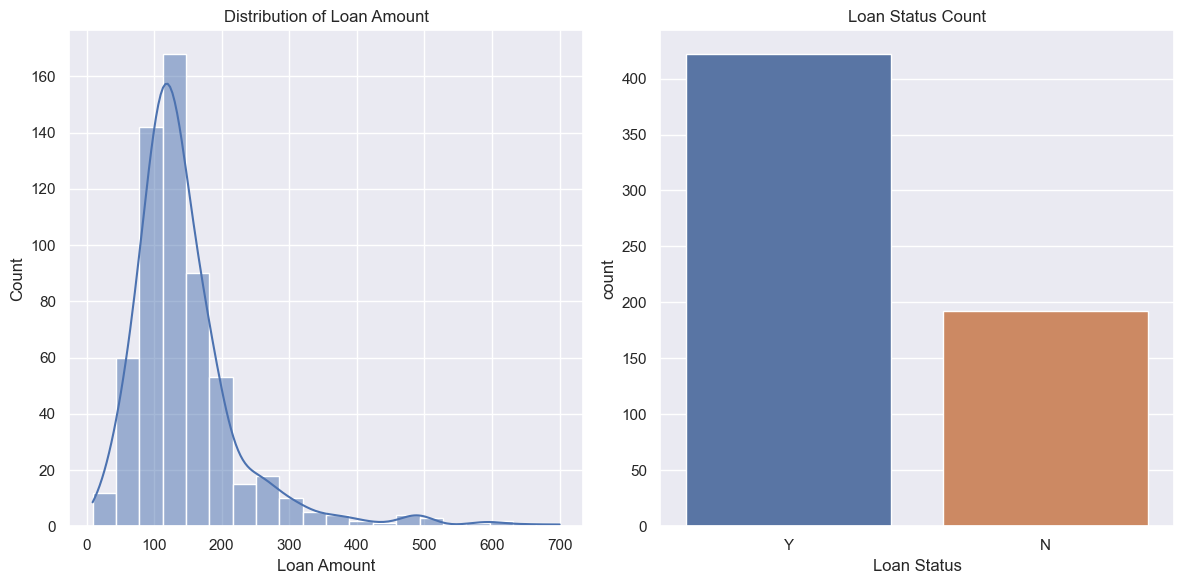

In [35]:
# Data visualization
plt.figure(figsize=(12, 6))

# Distribution of LoanAmount
plt.subplot(1, 2, 1)
sns.histplot(data=loan_data, x='LoanAmount', bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')

# Bar plot for Loan_Status
plt.subplot(1, 2, 2)
sns.countplot(data=loan_data, x='Loan_Status')
plt.title('Loan Status Count')
plt.xlabel('Loan Status')

plt.tight_layout()
plt.show()

##### We also plot the histograms to observe if the distribution of the respective variables are skewed or not. All the variables are left skewed indicating that outliers are present in the data which should be taken care of. 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

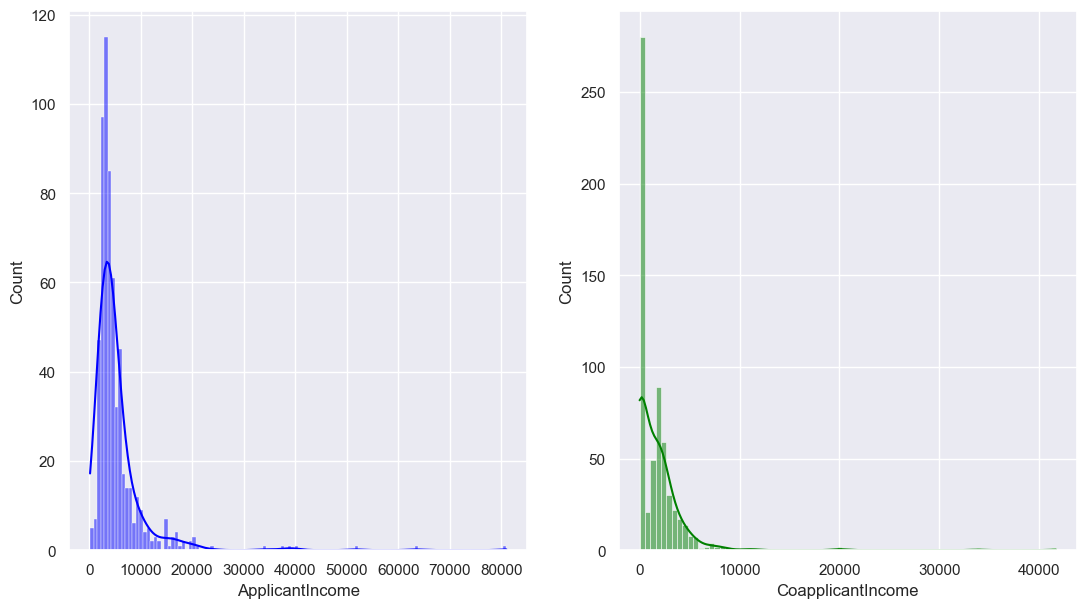

In [37]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax = axs[0], color='blue')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax = axs[1], color='green')

##### The relation heatmap depicts that there is a moderate positive relationship between Applicant Income and Loan Amount. This makes sense since, people with higher income would be given loans more preferably as they are more likey to repay

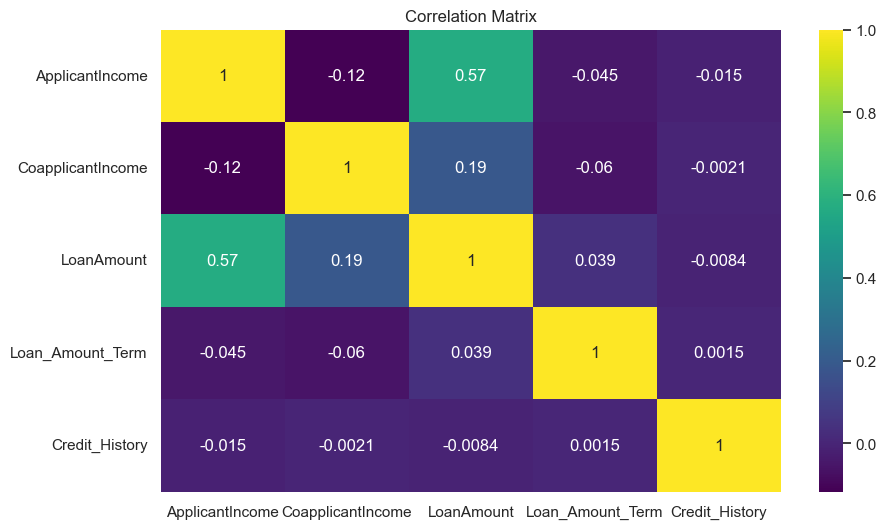

In [20]:
# Correlation analysis (heatmap)
plt.figure(figsize=(10, 6))
corr_matrix = loan_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')

plt.show()

#### We now explore some categorical variables focusing on Gender, Self Employment, Education and if the applicant is married or not with respect to the Loan amount they applied for.

##### We can observe that the majority of the loans taken are by males indicating that males are more in need of extra assistance from financial instituitions. In particular, from our dataset we can see that about 80% loans are taken by the male population with a maximum loan of $650. The average loan is also higher for the male population of about $150 compared to to only $126 of female

In [21]:
loan_data.groupby('Gender')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,109.0,126.697248,79.286460,9.0,88.0,113.0,138.0,600.0
Male,470.0,149.265957,82.810851,17.0,104.0,130.0,175.0,650.0


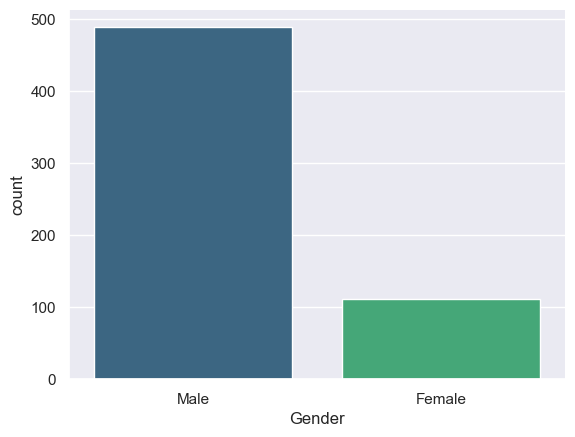

In [22]:
sns.countplot(x="Gender", data=loan_data, palette= 'viridis')
sns.despine()
plt.show()

In [23]:
countMale = len(loan_data[loan_data.Gender == 'Male'])
countFemale = len(loan_data[loan_data.Gender == 'Female'])
countNull = len(loan_data[loan_data.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(loan_data.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(loan_data.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


##### We can observe that a higher percentage of people who take loans are married couples. In particular, about 65% people who take loans in our dataset are married, with a maximum amount upto $700. The average loan amount is also higher for married people at $155 rather than $128 for the unmarried people. This can indicate that married couples may need loans for different reasons that maybe more costly. 

In [24]:
loan_data.groupby('Married')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Married,,,,,,,,
No,206.0,128.883495,74.385981,9.0,88.0,115.5,144.75,650.0
Yes,384.0,155.750000,89.934267,17.0,108.0,132.0,178.50,700.0


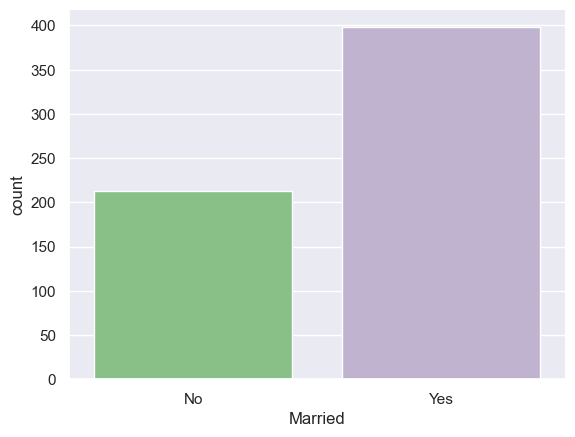

In [25]:
sns.countplot(x="Married", data=loan_data, palette= 'Accent')
sns.despine()
plt.show()

In [26]:
countMarried = len(loan_data[loan_data.Married == 'Yes'])
countNotMarried = len(loan_data[loan_data.Married == 'No'])
countNull = len(loan_data[loan_data.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(loan_data.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(loan_data.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


##### People who are self employed are less likely to ask for Loans, infact more than 80% requested for loans who are not self employed. People who are employed who are in need of further assistance prefer to take loans since they can assure the financial instituion that they can pay them back through their current employment in their respective time frame of loan time. 

In [27]:
loan_data.groupby('Self_Employed')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,482.0,141.748963,79.780919,9.0,100.0,125.0,161.75,700.0
Yes,79.0,172.000000,108.634650,25.0,106.0,150.0,189.00,650.0


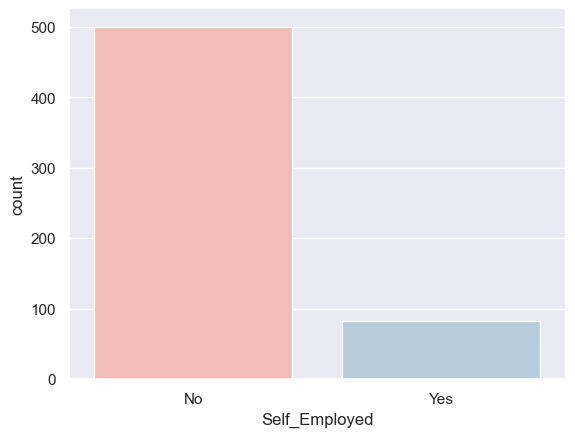

In [28]:
sns.countplot(x="Self_Employed", data=loan_data, palette= 'Pastel1')
sns.despine()
plt.show()

In [29]:
countNo = len(loan_data[loan_data.Self_Employed == 'No'])
countYes = len(loan_data[loan_data.Self_Employed == 'Yes'])
countNull = len(loan_data[loan_data.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(loan_data.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(loan_data.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


##### We can observe that education plays a significant role in loan amounts and approvals. Loan approval rate for graduates (71%) is slighlty higher than non graduates (63%). This indicates that graduates are prefeerred by financial institutions and grant them loans preferably. This is quite interesting and inutuitive since, it is less probable that graduates would be unable to repay the respective loans. One thing to keep in mind is the number of applicants were graduates as well thus the data might not be able to show the full picture with resepect to education.

In [30]:
loan_data.groupby(['Education', 'Loan_Status'])['LoanAmount'].describe()

count        mean        std   min    25%    50%  \
Education    Loan_Status                                                     
Graduate     N            134.0  161.388060  94.579553   9.0  104.0  135.0   
             Y            331.0  151.093656  92.166583  17.0  101.5  130.0   
Not Graduate N             47.0  122.234043  42.724707  35.0   94.0  120.0   
             Y             80.0  116.162500  38.031447  25.0   98.0  113.0   

                             75%    max  
Education    Loan_Status                 
Graduate     N            185.00  570.0  
             Y            175.00  700.0  
Not Graduate N            152.00  218.0  
             Y            130.25  279.0

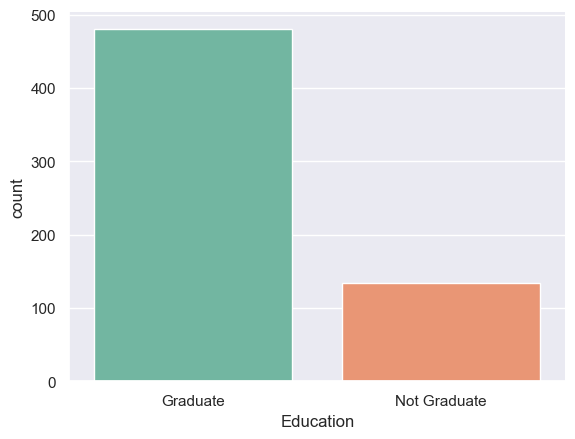

In [31]:
sns.countplot(x="Education", data=loan_data, palette = 'Set2')
sns.despine()
plt.show()

In [32]:
countGraduate = len(loan_data[loan_data.Education == 'Graduate'])
countNotGraduate = len(loan_data[loan_data.Education == 'Not Graduate'])
countNull = len(loan_data[loan_data.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(loan_data.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(loan_data.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(loan_data.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


<Figure size 1500x1000 with 0 Axes>

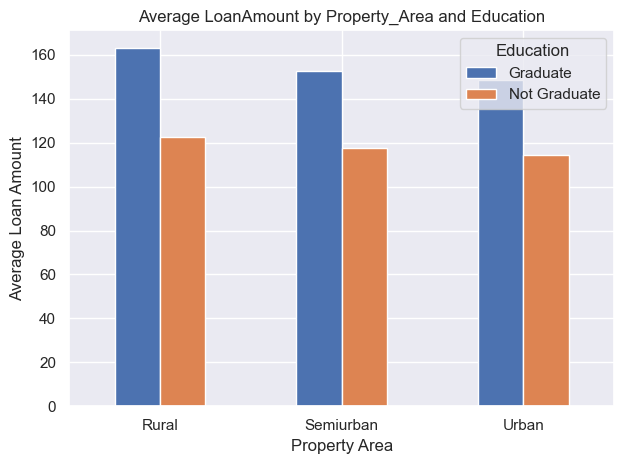

In [39]:
plt.figure(figsize=(15, 10))
grouped_bar = loan_data.groupby(['Property_Area', 'Education'])['LoanAmount'].mean().unstack()
grouped_bar.plot(kind='bar')
plt.title('Average LoanAmount by Property_Area and Education')
plt.ylabel('Average Loan Amount')
plt.xlabel('Property Area')
plt.xticks(rotation=0)
plt.legend(title='Education')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

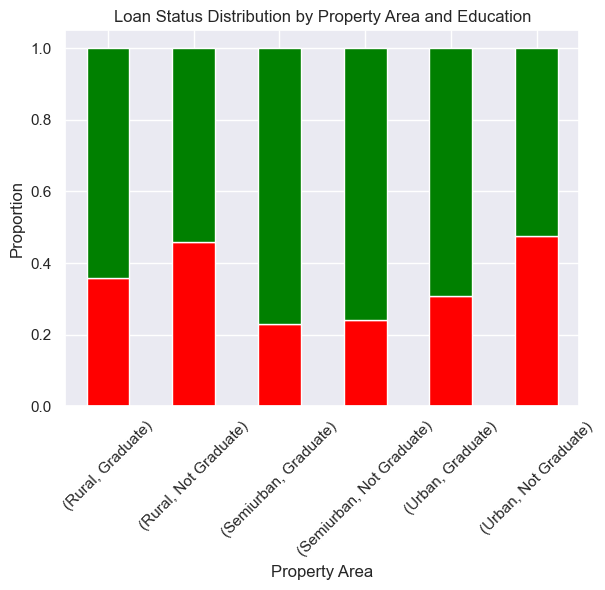

In [34]:
plt.figure(figsize=(10, 6))
stacked_bar = loan_data.groupby(['Property_Area', 'Education'])['Loan_Status'].value_counts(normalize=True).unstack()
stacked_bar.plot(kind='bar', stacked=True, color=['red', 'green'], legend = False)
plt.title('Loan Status Distribution by Property Area and Education')
plt.ylabel('Proportion')
plt.xlabel('Property Area')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

##### The highest loan amounts in the data set are for people living in the Urban areas. This is also quite intuitive since people in the urban areas prefer taking loans given they would have high opportunities to repay them. In terms of investmenets needed is also highest in the urban areas since urban cities are usually expensive compared to rural areas.

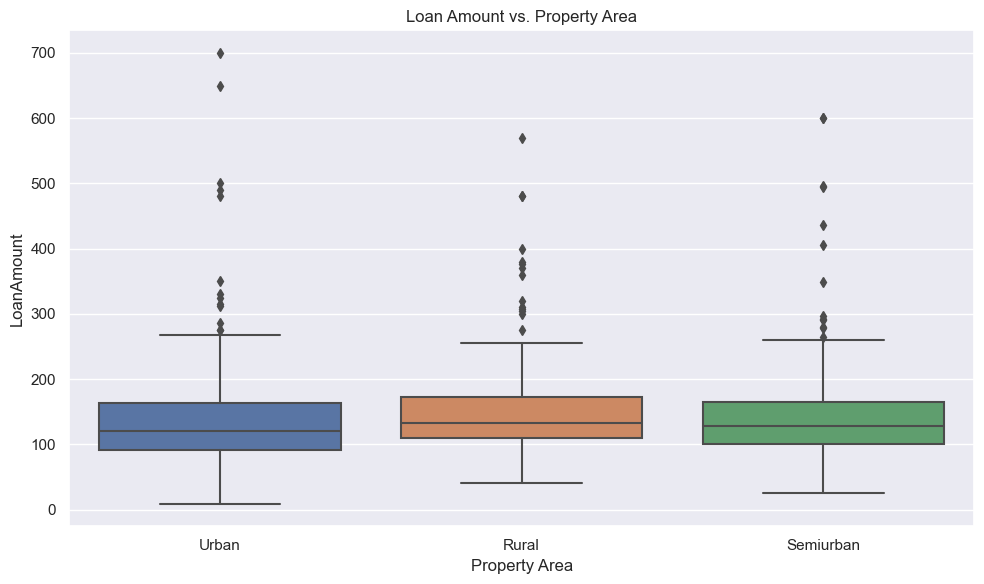

In [40]:
plt.figure(figsize=(10, 6))
# Box plot of LoanAmount vs. Property_Area
sns.boxplot(data=loan_data, x='Property_Area', y='LoanAmount')
plt.title('Loan Amount vs. Property Area')
plt.xlabel('Property Area')
plt.tight_layout()
plt.show()

##### The following boxplots shows the income distributions given the number of dependents of the applicant. It is very important to see that most people regardless of the number of dependents have similar ranges of income. There are a few outliers in each category except applicants with 2 dependents. 

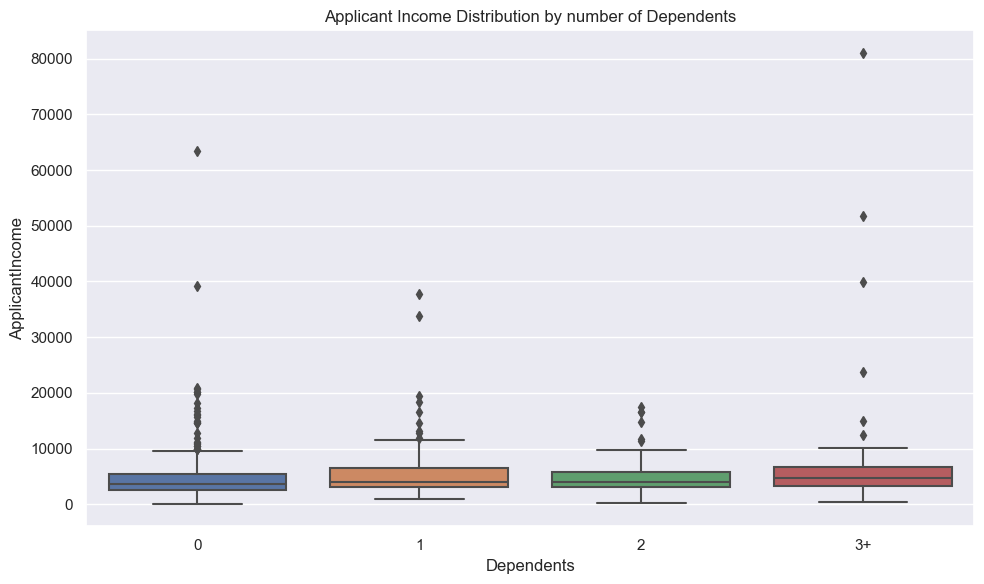

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='Dependents', y='ApplicantIncome')
plt.title('Applicant Income Distribution by number of Dependents')
plt.ylabel('ApplicantIncome')
plt.xlabel('Dependents')
plt.tight_layout()
plt.show()

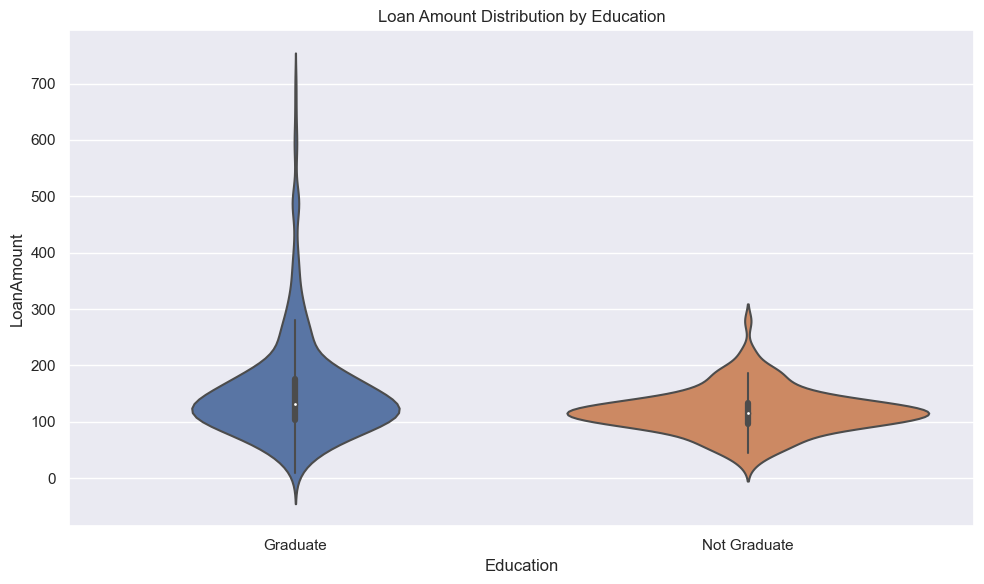

In [101]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=loan_data, x='Education', y='LoanAmount')
plt.title('Loan Amount Distribution by Education')
plt.ylabel('LoanAmount')
plt.xlabel('Education')
plt.tight_layout()
plt.show()

### Data Processing for Machine learning models

##### We drop the loan_id column since, it doesn't has any informative content for machine learning models to take into consideration. Moreover, loan_id column was a unique data column. 

In [ ]:
loan_data = loan_data.drop(columns = 'Loan_ID', axis = 1)

##### We perform data imputation on the categorical and numerical data. Note that rather than removing the rows that contained NULL values for specific columns, we plugged in new data points based on the values within that column. We inputted the mode (the most frequent data point) of the column inplace of the NULL values. Similarly, we replaced the empty data points in the numerical data with mean of the respective column

In [ ]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(),inplace=True)

### Feature Engineering : One-Hot Encoding

##### One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. It is a crucial part of feature engineering for machine learning. One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels.

##### When dealing with categorical variables that have no order or relationship, we need to take this one step further. Step two involves applying one-hot encoding to the integers we just assigned. To do this, we remove the integer encoded variable and add a binary variable for each unique variable. This is what we did below with our loan dataset. 

In [ ]:
loan_data = pd.get_dummies(loan_data) # we use get_dummis function to enable one-hot encoding

# Drop columns
loan_data = loan_data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
loan_data.rename(columns=new, inplace=True)

##### This is how our data now looks like where we can observe binary variables for all our categorical variables.

In [ ]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


##### The following code removes any outliers that made our data skewed. 

In [ ]:
Q1 = loan_data.quantile(0.25)
Q3 = loan_data.quantile(0.75)
IQR = Q3 - Q1

loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

##### Since, our distribution for the numerical variables (Applicant Income, Loan Amount and Additional Income) were skewed we will be applying transformation to normalize our data by applying the square root transformation, where we perform a mathematical operation that can help normalize or stabilize the distribution of the variables. It can be useful when dealing with skewed data or when the relationship between variables appears to be nonlinear.

In [ ]:
# Square Root Transformation
loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)

In [ ]:
loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


##### We can see that now our data is normally distributed and can be further processed by the machine learning models we will use

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

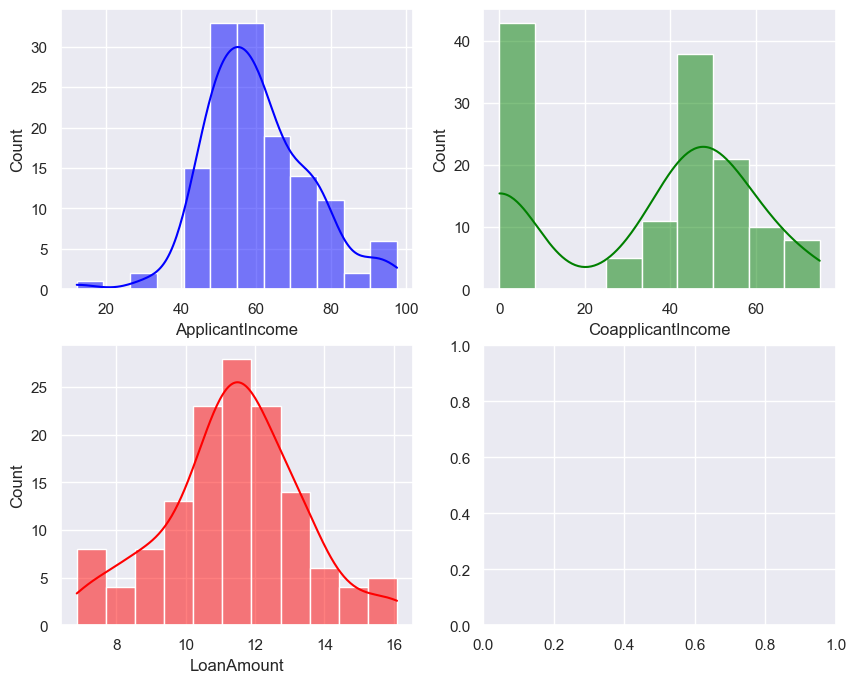

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='blue')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='green')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='red')

##### Feature separating, also known as feature separation or feature extraction, is a process in machine learning and data analysis where relevant and useful features are extracted from raw data. The goal of feature separating is to identify and isolate the most informative aspects or characteristics of the data that can be used to effectively represent and discriminate between different classes or categories. Feature separating is crucial because it can improve the performance and efficiency of machine learning models by reducing the complexity of the data representation, removing redundant or irrelevant information, and focusing on the most discriminative aspects of the data. It can also help in understanding the underlying patterns and structures within the data, enabling better interpretability and insights into the problem domain.

##### Thus, the dependent feature which we are predicting (loan status) is going to be separated from our data set

In [ ]:
X = loan_data.drop(["Loan_Status"], axis=1)
y = loan_data["Loan_Status"]

##### SMOTE (Synthetic Minority Over-sampling Technique) is a popular data augmentation technique used in machine learning to address the class imbalance problem. Class imbalance occurs when the classes in a dataset are not represented equally, and one class (the minority class) has significantly fewer samples than the other class (the majority class). This imbalance can negatively impact the performance of machine learning models, particularly in classification tasks. By creating synthetic samples, SMOTE helps to balance the class distribution and increase the number of instances in the minority class. This can help in training machine learning models to better recognize and classify the minority class, ultimately improving overall performance and mitigating the impact of class imbalance.

##### Since, there is an imbalance in our loan dataset between approved and rejected loans, we need to apply the SMOTE technique in order to balance the distribution of loan approvals.

In [ ]:
X, y = SMOTE().fit_resample(X, y)

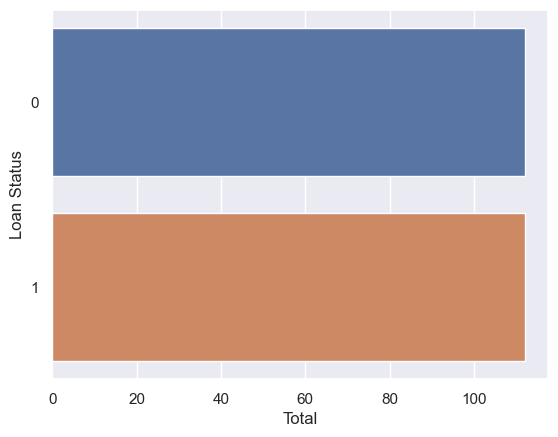

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=loan_data)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

##### The following code is performing min-max scaling on the values containing in the dataset, which rescales the features to a specific range. Note that the MinMaxScaler is a data preprocessing technique that scales the features of a dataset to a specific range, usually between 0 and 1. The "fit_transform" method computes the minimum and maximum values of the dataset and then scales the data according to the specified feature range. We then split the data into training and testing data sets with a 80/20 train/test ratio. 

In [ ]:
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Machine Learning Models
##### Since, our data is clean and ready to be used with any machine learning model, we can apply our training data to build models with different models. In thhis project we will be using Logistic Regression, K-Nearest Neighbour (KNN), Support Vector Machine (SVM), Naive Bayes, Decision Tree, Random Forest and Gradient Boosting and then compare the different models to see which works the best to predict the loan eligibility or loan status in our data.

### Logistic Regression

##### Logistic regression is a supervised machine learning model used for binary classification. It predicts the probability of an instance belonging to a certain class by applying a sigmoid function to a weighted sum of input features. The model learns the optimal weights during training using optimization algorithms. After training, it can classify new instances by comparing the predicted probability to a threshold. Logistic regression is popular due to its simplicity, interpretability, and efficiency. It is effective when the relationship between features and output is assumed to be linear on the log-odds scale, but may not perform well for complex or non-linear relationships.

##### The following code initializes a logistic regression classifier object called LRclassifier with specific parameters. The solver parameter is set to 'saga', indicating the algorithm used to solve the optimization problem. The max_iter parameter sets the maximum number of iterations for the solver. We then predict the values based off the model with testing data and check the overall accuracy of the model as well which stands at 80%

In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.82      0.82      0.82        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45

[[19  4]
 [ 4 18]]
LR accuracy: 82.22%


### K-Nearest Neighbor (KNN)

##### K-Nearest Neighbors (KNN) is a machine learning algorithm used for classification and regression tasks. It works by finding the K nearest labeled data points in the training set to a given unlabeled data point and making predictions based on their class labels or values. KNN is a non-parametric algorithm that does not assume any underlying data distribution. During training, it memorizes the training data instead of building an explicit model. When predicting, it calculates the distance between the unlabeled data point and all the labeled data points using a chosen distance metric. The K closest data points are selected, and the majority class label or average value of their labels is assigned as the prediction for classification or regression, respectively. KNN's simplicity makes it easy to understand and implement, but it can be slower for prediction with large datasets. The choice of K and the distance metric greatly influence its performance.

##### The following code calculates and plots the accuracy scores of a K-Nearest Neighbors (KNN) classifier for different values of K. It initializes an empty list called "scoreListknn" to store the scores. It then iterates over values of K from 1 to 20. In each iteration, a KNN classifier is created with the current K value, trained on the training data (X_train and y_train), and tested on the test data (X_test and y_test). The accuracy score is computed and appended to the "scoreListknn" list. Finally, the code prints the best accuracy with the K value as a percentage.

c:\Users\danis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\danis\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

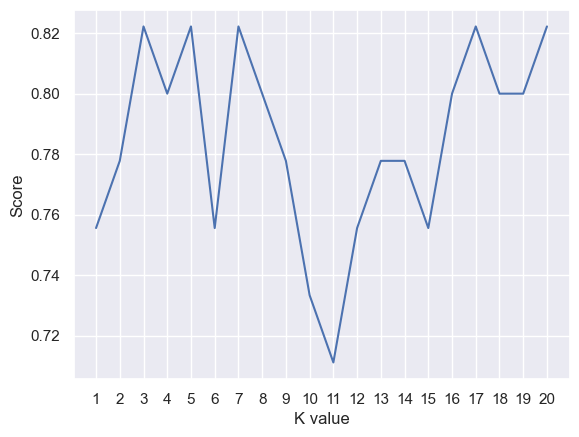

KNN best accuracy: 82.22%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

### Support Vector Machine (SVM)

##### Support Vector Machine (SVM) is a powerful machine learning model used for classification and regression tasks. It finds a hyperplane in a high-dimensional space that optimally separates different classes by maximizing the margin between them. SVM can handle linearly separable and non-linearly separable data by using kernel functions to transform the data into a higher-dimensional feature space. It aims to find the decision boundary that best generalizes to unseen data and minimizes classification errors. SVM is effective in dealing with high-dimensional data and performs well with small to medium-sized datasets.

##### The code below utilizes the Support Vector Classifier (SVC) model with a radial basis function (RBF) kernel. The RBF kernel measures the similarity between data points based on their Euclidean distance. The SVC model is trained on the training data (X_train and y_train) using the fit() method. The model is then used to predict the labels for the test data (X_test) using the predict() method, and the predictions are stored in the variable y_pred. The code then prints a classification report and a confusion matrix to evaluate the model's performance on the test data.

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.75      0.95      0.84        22

    accuracy                           0.82        45
   macro avg       0.85      0.83      0.82        45
weighted avg       0.85      0.82      0.82        45

[[16  7]
 [ 1 21]]
SVC accuracy: 82.22%


### Naive Bayes

##### Naive Bayes is a popular machine learning model based on the Bayes' theorem with the assumption of feature independence. It is particularly effective for text classification and spam filtering tasks. Naive Bayes calculates the probability of a particular class given the input features using Bayes' theorem. It assumes that the features are conditionally independent, meaning that the presence or absence of one feature does not affect the presence or absence of other features. The model learns the probabilities of different classes and feature occurrences from the training data. During prediction, it computes the probability of each class for a given input and selects the class with the highest probability as the prediction. Naive Bayes is computationally efficient, has low memory requirements, and performs well on large datasets.

##### The following code uses the Categorical Naive Bayes classifier (CategoricalNB) to perform classification. The classifier is trained on the training data (X_train and y_train) using the fit() method. Next, the classifier is used to predict the labels for the test data (X_test) using the predict() method, and the predictions are stored in the variable y_pred. The code then prints a classification report and a confusion matrix to evaluate the model's performance on the test data.

In [ ]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75        23
           1       0.80      0.55      0.65        22

    accuracy                           0.71        45
   macro avg       0.73      0.71      0.70        45
weighted avg       0.73      0.71      0.70        45

[[20  3]
 [10 12]]
Categorical Naive Bayes accuracy: 71.11%


### Gaussian Naive Bayes

##### Gaussian Naive Bayes (GaussianNB) is a machine learning model based on the Naive Bayes algorithm, specifically designed for continuous input features that follow a Gaussian (normal) distribution. It assumes that each class is generated from a Gaussian distribution with its own mean and variance. During training, GaussianNB learns the mean and variance of each feature for each class from the labeled training data. It then uses Bayes' theorem to calculate the posterior probability of each class given the input features. During prediction, the model computes the likelihood of the input features belonging to each class using the Gaussian probability density function. It selects the class with the highest likelihood as the prediction.

##### This code utilizes the Gaussian Naive Bayes classifier (GaussianNB) for classification. The classifier is created and trained on the training data (X_train and y_train) using the fit() method. The classifier is then used to predict the labels for the test data (X_test) using the predict() method, and the predictions are stored in the variable y_pred. The code then prints a classification report and a confusion matrix to evaluate the performance of the model on the test data alongside an accuracy score to check how well the model predicted the values against the test data.

In [ ]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.75      0.55      0.63        22

    accuracy                           0.69        45
   macro avg       0.70      0.69      0.68        45
weighted avg       0.70      0.69      0.68        45

[[19  4]
 [10 12]]
Gaussian Naive Bayes accuracy: 68.89%


### Decision/Classification Trees

##### Decision Trees are machine learning models that use a tree-like structure to make predictions. The tree consists of internal nodes representing features, branches representing decision rules, and leaf nodes representing the predicted outcome or class label. The model learns by recursively splitting the data based on the most informative features, aiming to maximize the information gain or Gini impurity reduction at each split. Decision Trees can handle both categorical and numerical features, and they can handle multi-class classification and regression tasks. They are interpretable and can capture non-linear relationships and feature interactions. However, they are prone to overfitting and can be sensitive to small changes in the training data.

##### The code below calculates and plots the accuracy scores of a Decision Tree classifier for different values of the maximum number of leaf nodes. It initializes an empty list called "scoreListDT" to store the scores. It then iterates over values from 2 to 20, creating a Decision Tree classifier with the current maximum leaf nodes value. The classifier is trained on the training data (X_train and y_train) and tested on the test data (X_test and y_test). The accuracy score is computed and appended to the "scoreListDT" list and the maximum for this model stands at about 80%

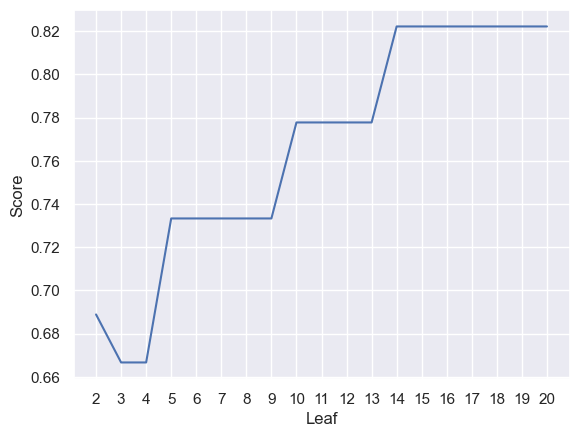

Decision Tree Accuracy: 82.22%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

### Random Forest

##### Random Forest is an ensemble machine learning model that combines multiple decision trees to make predictions. It works by training a collection of decision trees on random subsets of the training data, where each tree provides a vote for the final prediction. Random Forest improves upon single decision trees by reducing overfitting and increasing generalization performance. It introduces randomness in two ways: random sampling of data points with replacement (bootstrap aggregating or "bagging") and random feature selection during tree construction. This randomness helps in creating diverse trees, leading to a robust and accurate ensemble model. Random Forest is effective for classification and regression tasks and can handle high-dimensional data with ease.

##### The code below calculates and plots the accuracy scores of a Random Forest classifier for different values of the maximum number of leaf nodes. It initializes an empty list called "scoreListRF" to store the scores. It then iterates over values from 2 to 24, creating a Random Forest classifier with 1000 estimators and a specified random state for reproducibility. The classifier is trained on the training data (X_train and y_train) and tested on the test data (X_test and y_test). The accuracy score is computed and appended to the "scoreListRF" list. Note that it makes sense that the random forest has a higher accuracy score 84% than normal decision trees model!

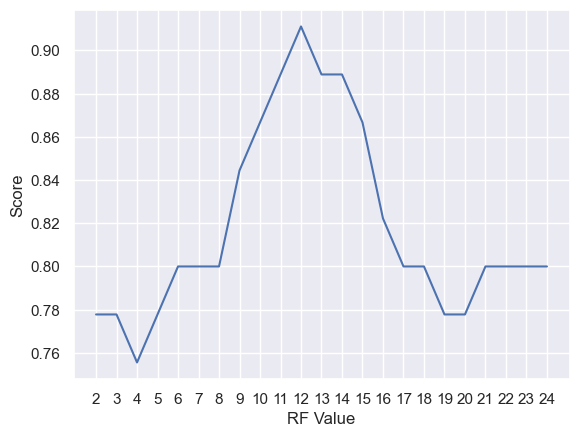

Random Forest Accuracy:  91.11%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

### XGBoost

##### XGBoost (eXtreme Gradient Boosting) is a powerful machine learning model based on the gradient boosting framework. It is designed to optimize performance and handle complex regression and classification tasks. XGBoost iteratively combines weak base learners, typically decision trees, to create a strong ensemble model. It builds upon the gradient descent optimization technique by incorporating a more refined objective function and applying regularization techniques to prevent overfitting. XGBoost excels in handling large datasets and can effectively handle missing values. It offers fast execution and scalability while achieving state-of-the-art performance on various machine learning problems. It has become a popular choice in machine learning competitions and is widely used in industry applications.

##### This code performs hyperparameter tuning for a Gradient Boosting Classifier using RandomizedSearchCV. The paramsGB dictionary defines different hyperparameter values to explore. It specifies potential values for 'n_estimators' (number of boosting stages), 'max_depth' (maximum depth of each tree), 'subsample' (fraction of samples used for fitting each tree), and 'max_leaf_nodes' (maximum number of leaf nodes in each tree). The RandomizedSearchCV function is used to conduct a randomized search over the hyperparameter space. It takes the GradientBoostingClassifier as the estimator, the paramsGB dictionary as the parameter grid, and performs cross-validation with 20 folds.

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=500,
                           subsample=0.5)
0.8159722222222221
{'subsample': 0.5, 'n_estimators': 500, 'max_leaf_nodes': 50, 'max_depth': 5}
5


In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.81      0.77      0.79        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

[[19  4]
 [ 5 17]]
Gradient Boosting accuracy: 80.00%


## Comapring Models

##### Through our study, we can observe that the most accurate model used to predict the loan status came out to be Ranndom Forest model with an accuracy of about 90% followed by logistic regression and Support Vector Machine with 82% followed by the rest.

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Random Forest,91.111111
0,Logistic Regression,82.222222
1,K Neighbors,82.222222
2,SVM,82.222222
5,Decision Tree,82.222222
7,Gradient Boost,80.000000
3,Categorical NB,71.111111
4,Gaussian NB,68.888889
